In [1]:
import numpy as np
import matplotlib.pyplot as plt
from poles_roots.aaa import AAA
from poles_roots.plotting import phase_plot
import time

In [8]:
M = 100

def f(z):
    return np.sqrt(1.00001+z)

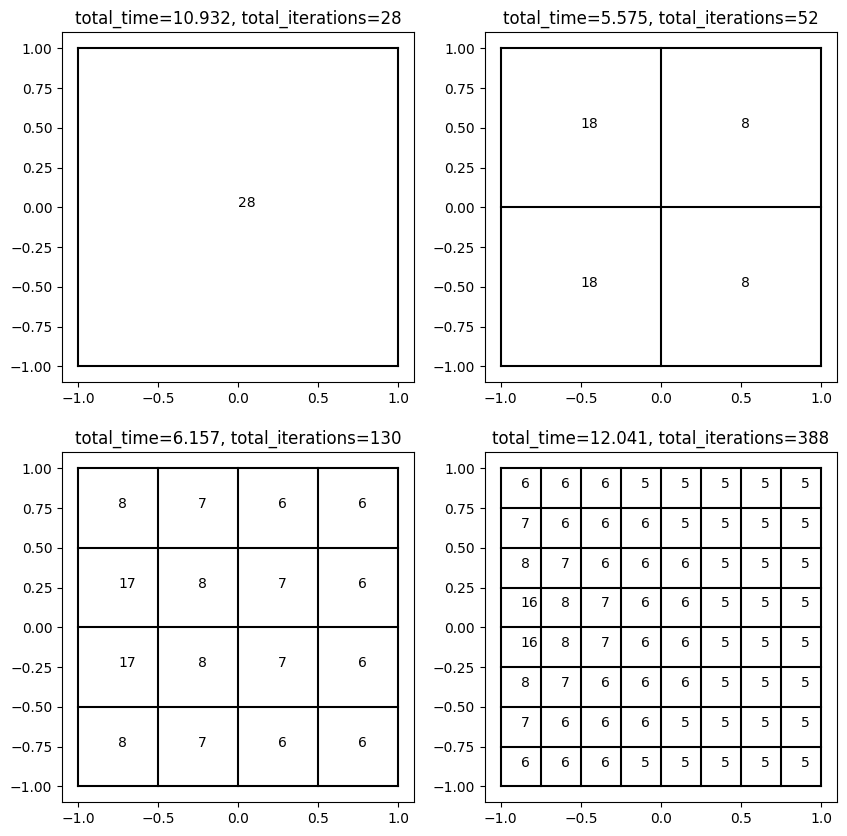

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

for level in range(4):
    ax = axs.ravel()[level]
    corners = np.linspace(-1, 1 , 2**level +1)
    
    ax.plot([-1, 1], np.stack([corners, corners]), 'k-')
    ax.plot(np.stack([corners, corners]),[-1, 1] , 'k-')
    x = np.linspace(-1, 1, num=500)
    y = np.linspace(-1, 1, num=500)
    
    total_time = 0
    total_iterations = 0
    for i in range(corners.size - 1):
        for j in range(corners.size -1):
            xx ,yy = np.meshgrid(x[(x >= corners[i]) & (x <= corners[i+1])], y[(y >= corners[j]) & (y <= corners[j+1])])
            z = (xx + yy*1j).ravel()
            tic = time.perf_counter()
            res = AAA(f(z), z)
            toc = time.perf_counter()
            total_time += toc - tic
            total_iterations += res.weights.size
            ax.text(np.mean([corners[i], corners[i + 1]]), np.mean([corners[j], corners[j + 1]]), res.weights.size)
    ax.set_title(f"{total_time=:.3f}, {total_iterations=}")
            

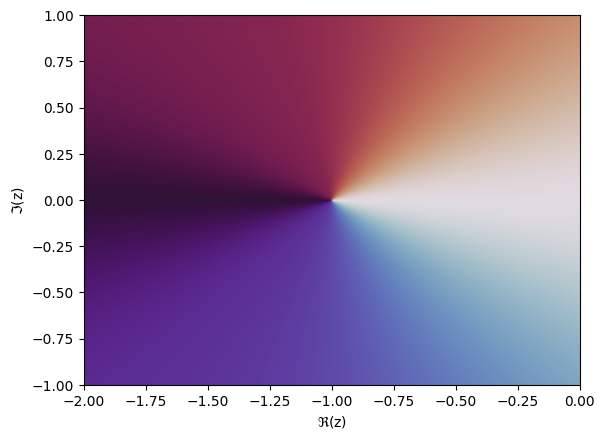

In [7]:
fig, ax = plt.subplots()
phase_plot(lambda z: np.sqrt(1.00001 + z), ax, domain=[-2, 0, -1, 1])